## This is a data EDA notebook template
Use this as a template to create research/report/data view/data analysis jupyter notrebooks

In [1]:
import pandas as pd

## Data Obtaining

### Check if we are in colab and deal with it

In [2]:
RunningInCOLAB = 'google.colab' in str(get_ipython())
if RunningInCOLAB:
    from google.colab import drive
    drive.mount('/gdrive')


Mounted at /gdrive


In [3]:
if RunningInCOLAB:
    script = """mkdir -p ~/.ssh
ssh-keyscan -t rsa github.com > ~/.ssh/known_hosts
tar -xzvf /gdrive/MyDrive/ssh-keys/colab.tar.gz
cp root/.ssh/id_rsa ~/.ssh/
cp root/.ssh/id_rsa.pub ~/.ssh/
git clone git@github.com:caretech-human/experimental-data.git
mkdir "sensor data"
cp -r "/content/experimental-data/sensor data/20210914 SOE TGS COMPARE" "sensor data"
    """
    with open('pull.sh', "w+") as f:
        f.write(script)
    import os
    os.system('sh pull.sh')

### Read test data into dataframe

In [9]:
data_path = './sensor data/20210914 SOE TGS COMPARE/14/1631607436.csv'

In [10]:

df = pd.read_csv(data_path, delimiter=';')

In [11]:
df.head()

,firmware,serial,uiversion,runid,tdel,timestamp,algo,algoName,tm,Sensor Name,sensor,td,h,h_raw,Exper.Time,Exper.Time(absolute),u,g,Sensor Name.1,sensor.1,td.1,h.1,h_raw.1,Exper.Time.1,Exper.Time(absolute).1,u.1,g.1,Sensor Name.2,sensor.2,td.2,h.2,h_raw.2,Exper.Time.2,Exper.Time(absolute).2,u.2,g.2,Sensor Name.3,sensor.3,td.3,h.3,h_raw.3,Exper.Time.3,Exper.Time(absolute).3,u.3,g.3,timestamp.1,Temp,Delta Temp,Hum,Delta Hum
0,(V3)cwp_v2021_21,246F28A998D0,version3-8716f48,1631607436,10,20210914_111716,7,a6,20,N17-TGS-8100,1,2500,1147,178,0,0,4317,48.4784,N23-TGS-8100,2,2500,1147,178,24980,0,4878,58.4612,N21-TGS-8100,3,2500,1147,178,49960,0,6325,91.5738,N22-TGS-8100,4,2500,1147,178,74940,0,5286,66.4906,858.0,25.1,0.2,0.0,0.0
1,(V3)cwp_v2021_21,246F28A998D0,version3-8716f48,1631607436,10,20210914_111716,7,a6,20,N17-TGS-8100,1,2500,1147,178,20,20,7036,113.7407,N23-TGS-8100,2,2500,1147,178,25000,20,7654,137.4641,N21-TGS-8100,3,2500,1147,178,49980,20,8533,181.5918,N22-TGS-8100,4,2500,1147,178,74960,20,7798,143.3983,1864.0,25.2,0.1,0.0,0.0
2,(V3)cwp_v2021_21,246F28A998D0,version3-8716f48,1631607436,10,20210914_111716,7,a6,20,N17-TGS-8100,1,2500,1147,178,40,40,7237,120.9190,N23-TGS-8100,2,2500,1147,178,25020,40,7871,147.0940,N21-TGS-8100,3,2500,1147,178,50000,40,8644,188.4045,N22-TGS-8100,4,2500,1147,178,74980,40,7992,152.4027,2768.0,25.2,0.1,0.0,0.0
3,(V3)cwp_v2021_21,246F28A998D0,version3-8716f48,1631607436,10,20210914_111716,7,a6,20,N17-TGS-8100,1,2500,1147,178,60,60,7335,124.5966,N23-TGS-8100,2,2500,1147,178,25040,60,7968,151.6559,N21-TGS-8100,3,2500,1147,178,50020,60,8685,191.0051,N22-TGS-8100,4,2500,1147,178,75000,60,8087,157.0596,3771.0,25.3,0.0,0.0,0.0
4,(V3)cwp_v2021_21,246F28A998D0,version3-8716f48,1631607436,10,20210914_111716,7,a6,20,N17-TGS-8100,1,2500,1147,178,80,80,7405,127.2993,N23-TGS-8100,2,2500,1147,178,25060,80,8029,154.6120,N21-TGS-8100,3,2500,1147,178,50040,80,8706,192.3553,N22-TGS-8100,4,2500,1147,178,75020,80,8150,160.2438,4774.0,25.3,0.0,0.0,0.0


In [12]:
df.columns.values

array(['firmware', 'serial', 'uiversion', 'runid', 'tdel', 'timestamp',
       'algo', 'algoName', 'tm', 'Sensor Name', 'sensor', 'td', 'h',
       'h_raw', 'Exper.Time', 'Exper.Time(absolute)', 'u', 'g',
       'Sensor Name.1', 'sensor.1', 'td.1', 'h.1', 'h_raw.1',
       'Exper.Time.1', 'Exper.Time(absolute).1', 'u.1', 'g.1',
       'Sensor Name.2', 'sensor.2', 'td.2', 'h.2', 'h_raw.2',
       'Exper.Time.2', 'Exper.Time(absolute).2', 'u.2', 'g.2',
       'Sensor Name.3', 'sensor.3', 'td.3', 'h.3', 'h_raw.3',
       'Exper.Time.3', 'Exper.Time(absolute).3', 'u.3', 'g.3',
       'timestamp.1', 'Temp', 'Delta Temp', 'Hum', 'Delta Hum'],
      dtype=object)

### Visualize the data

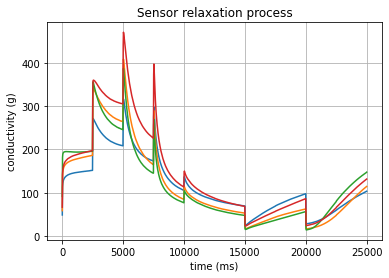

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = df['Exper.Time']
s = df['g']
s1 = df['g.1']
s2 = df['g.2']
s3 = df['g.3']

fig, ax = plt.subplots()
ax.plot(t, s)
ax.plot(t, s1)
ax.plot(t, s2)
ax.plot(t, s3)


ax.set(xlabel='time (ms)', ylabel='conductivity (g)',
       title='Sensor relaxation process')
ax.grid()

# fig.savefig("relaxation.png")
plt.show()